# Multiobjective optimalization

In [1]:
using EO

### Knapsack

In [2]:
pop_size = 100
dimension = 10

F = typeof(enclose_arguments(EO.f_weighted_sum, ones(dimension)))
objective_function  = EO.MultiObjFunction{F}([enclose_arguments(EO.f_weighted_sum, ones(dimension)), enclose_arguments(EO.f_weighted_sum, zeros(dimension))])
initialization      = enclose_noargs(binary_initialization, dimension, pop_size, objective_function)
selection           = enclose_arguments(EO.s_identity, pop_size*2)
crossover           = cr_single_point
mutation            = enclose_arguments(basic_preturbation!, 0.25)
replacement         = EO.enclose_replacement(EO.r_NSGA, pop_size)
termination         = enclose_argument(iteration_termination, 1000)

solution = solvink_hart(objective_function, initialization, selection, crossover, mutation, replacement, termination)
@show solution
@show EO.get_domination_count(solution.fitness)

#EO.plot_results(solution)

solution = EO.MultiObjPopulation{BinaryChromosome}(BinaryChromosome[BinaryChromosome(Bool[0, 0, 0, 0, 0, 0, 0, 0, 0, 0], 10), BinaryChromosome(Bool[0, 0, 0, 0, 0, 0, 0, 0, 0, 0], 10), BinaryChromosome(Bool[0, 0, 0, 0, 0, 0, 0, 0, 0, 0], 10), BinaryChromosome(Bool[0, 0, 0, 0, 0, 0, 0, 0, 0, 0], 10), BinaryChromosome(Bool[0, 0, 0, 0, 0, 0, 0, 0, 0, 0], 10), BinaryChromosome(Bool[0, 0, 0, 0, 0, 0, 0, 0, 0, 0], 10), BinaryChromosome(Bool[0, 0, 0, 0, 0, 0, 0, 0, 0, 0], 10), BinaryChromosome(Bool[0, 0, 0, 0, 0, 0, 0, 0, 0, 0], 10), BinaryChromosome(Bool[0, 0, 0, 0, 0, 0, 0, 0, 0, 0], 10), BinaryChromosome(Bool[0, 0, 0, 0, 0, 0, 0, 0, 0, 0], 10), BinaryChromosome(Bool[0, 0, 0, 0, 0, 0, 0, 0, 0, 0], 10), BinaryChromosome(Bool[0, 0, 0, 0, 0, 0, 0, 0, 0, 0], 10), BinaryChromosome(Bool[0, 0, 0, 0, 0, 0, 0, 0, 0, 0], 10), BinaryChromosome(Bool[0, 0, 0, 0, 0, 0, 0, 0, 0, 0], 10), BinaryChromosome(Bool[0, 0, 0, 0, 0, 0, 0, 0, 0, 0], 10), BinaryChromosome(Bool[0, 0, 0, 0, 0, 0, 0, 0, 0, 0], 10), Bina

100-element Vector{Int64}:
  0
  0
  0
  0
  0
  0
  0
  0
  0
  0
  ⋮
 32
 32
 32
 32
 32
 32
 32
 32
 32

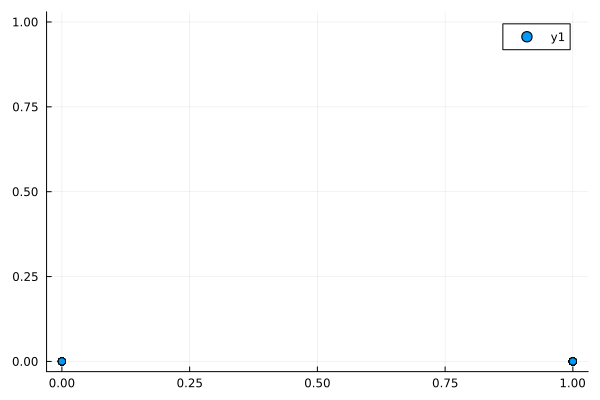

In [3]:
using Plots

x = map(x->x[2][1], enumerate(solution.fitness))
y = map(x->x[2][2], enumerate(solution.fitness))
scatter(x, y)

### Two simple objectives

In [21]:
using EO

pop_size = 100
dimension = 2

F = typeof(enclose_arguments(EO.f_weighted_sum, ones(dimension)))
objective_function  = EO.MultiObjFunction{F}([enclose_arguments(EO.f_sphere, ones(dimension)), EO.f_rastrigin])
initialization      = enclose_noargs(interval_real_initialization, dimension, pop_size, objective_function, -100, 100)
selection           = enclose_arguments(EO.s_identity, pop_size*2)
crossover           = cr_single_point
mutation            = enclose_arguments(gaussian_preturbation!, 0.25)
replacement         = EO.enclose_replacement(EO.r_NSGA, pop_size)
termination         = enclose_argument(iteration_termination, 10000)

solution = solvink_hart(objective_function, initialization, selection, crossover, mutation, replacement, termination)
@show solution

solution = top_x: Real[0.013381407055422248, 0.0355602429766384]
top_f: 1.9035602928712192
penalty: 0.2853399205534899



top_x: Real[0.013381407055422248, 0.0355602429766384]
top_f: 1.9035602928712192
penalty: 0.2853399205534899


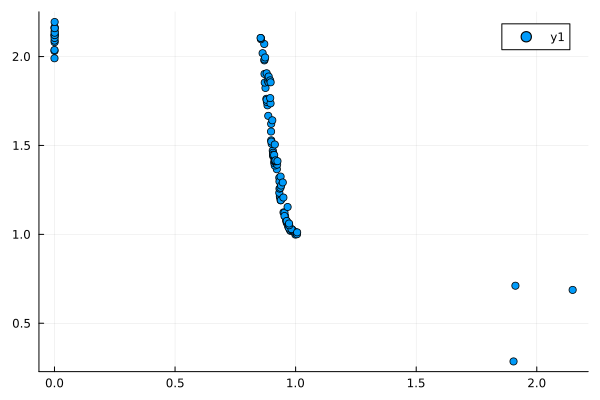

In [22]:
using Plots

x = map(x->x[2][1], enumerate(solution.pop_history[end].fitness))
y = map(x->x[2][2], enumerate(solution.pop_history[end].fitness))
scatter(x, y)

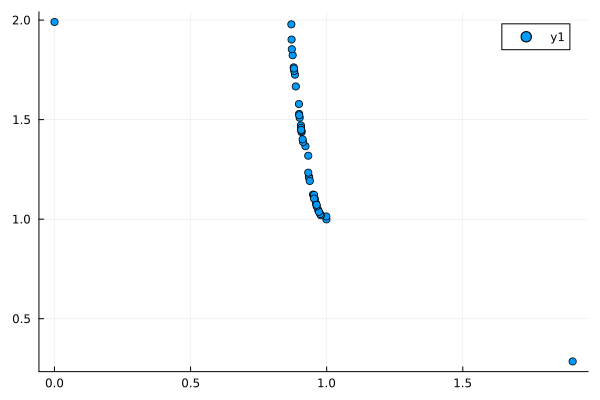

In [23]:
using Plots
idx = findall(EO.get_domination_count(solution.pop_history[end].fitness).==0)
x = map(x->x[2][1], enumerate(solution.pop_history[end].fitness[idx]))
y = map(x->x[2][2], enumerate(solution.pop_history[end].fitness[idx]))
scatter(x, y)

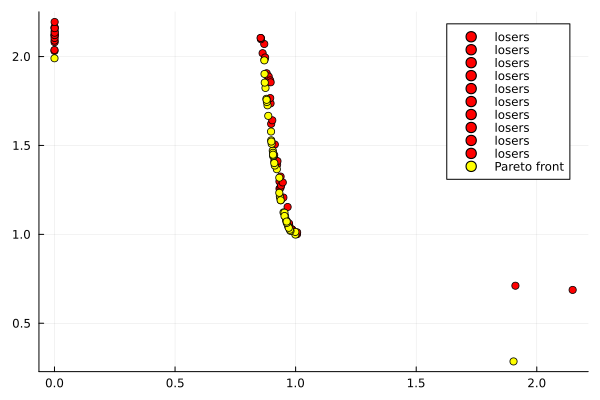

In [24]:
p = scatter()

for i in 1:maximum(EO.get_domination_count(solution.pop_history[end].fitness))
    idx = findall(EO.get_domination_count(solution.pop_history[end].fitness).==i)
    x = map(x->x[2][1], enumerate(solution.pop_history[end].fitness[idx]))
    y = map(x->x[2][2], enumerate(solution.pop_history[end].fitness[idx]))
    p = scatter!(p, x, y, label="losers", color=:red)
end

idx = findall(EO.get_domination_count(solution.pop_history[end].fitness).==0)
x = map(x->x[2][1], enumerate(solution.pop_history[end].fitness[idx]))
y = map(x->x[2][2], enumerate(solution.pop_history[end].fitness[idx]))
p = scatter!(p, x, y, label="Pareto front", color=:yellow)

p